In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import fit_library as fit_lib
import fit_library_n as fit_lib_n
import pandas as pd
%matplotlib nbagg
%reload_ext autoreload
%autoreload 2

In [24]:
# DATA
TH_HIGH = 1.414
TH_LOW = 0.404
Cint = 6.18E-12
GATE = 500E-9
pQ = 1E-12
#Ileak = 3.52E-6  # Computed from an empty input flip (dV*Cint/GATE)
Ileak = 3.5E-6 # Histogram fitted

Qu = (TH_HIGH-TH_LOW)*Cint / pQ

In [25]:
#pe_density = ["200pe"]
df = pd.DataFrame(columns=['pe_density','Q_true','Q_measured','Qu','N_flips','Q_residue'])



In [26]:
#pe_density = ["200pe","100pe","50pe","25pe"]
pe_density = ["1pe"]

for pe in pe_density:
        if (pe == "200pe"):
            n_pe = 4000
        if (pe == "100pe"):
            n_pe = 2000
        if (pe == "50pe"):
            n_pe = 1000
        if (pe == "25pe"):
            n_pe = 500
        #n_pe = 750
        if (pe == "1pe"):
            n_pe = 6
        
        for set_d in range(1,201):
            file = "_" + pe + "500ns_"+str(n_pe)+"pe"+ "_set" + str(set_d) + ".txt"

            Q_total = np.array(pd.read_csv("/home/viherbos/TEMP/results/few_pe/Qtotal"+ file ,header=None))
            residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
            counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
            residue = (residue.to_numpy()-TH_LOW)*Cint / pQ
            counter = counter.to_numpy()

            residue_t = np.sum(residue[:,1])
            entero = np.array(counter[:,1], dtype='int')
            binario = np.array(entero[:], dtype='str')
            flips = 0
            n_gates = len(binario)
            for i in range(n_gates):
                flips = flips + int(binario[i],2)
            q_meas = flips*Qu + residue_t - Ileak*GATE*n_gates/pQ

            aux_pd = pd.DataFrame(data={'pe_density':[pe], 'Q_true':[Q_total[0,0]/pQ], 'Q_measured':[q_meas],
                                                'Qu':[Qu], 'N_flips':[flips], 'Q_residue':[residue_t]})
            df = df.append(aux_pd, ignore_index=True)

/tmp/ipykernel_7402/2455792190.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_

/tmp/ipykernel_7402/2455792190.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_

/tmp/ipykernel_7402/2455792190.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_

/tmp/ipykernel_7402/2455792190.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  residue=pd.read_csv("/home/viherbos/TEMP/results/few_pe/residue"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counter=pd.read_csv("/home/viherbos/TEMP/results/few_pe/counter"+ file,header=None,skiprows=2,sep="    ")
/tmp/ipykernel_7402/2455792190.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(aux_pd, ignore_index=True)
/tmp/ipykernel_

<IPython.core.display.Javascript object>


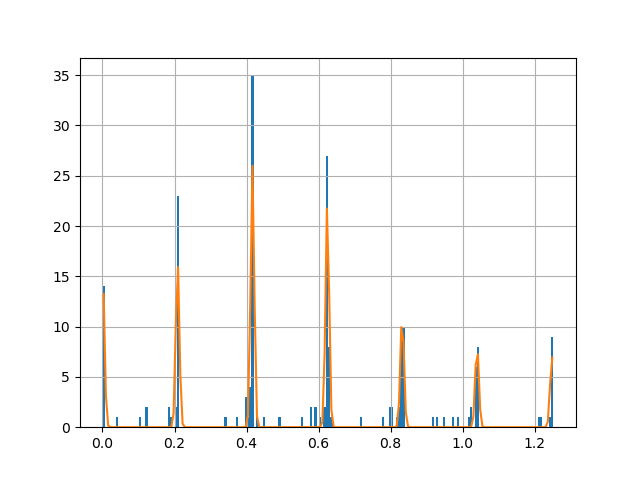

(200,)
(200,)
`ftol` termination condition is satisfied.
Function evaluations 19, initial cost 1.1931e+03, final cost 3.0402e+02, first-order optimality 4.99e+00.
pe Value in pC =  0.208


In [62]:
df['Q_measured'].hist(bins=200)
y,x = np.histogram(df['Q_measured'],bins=200)
x = (x[:-1] + x[1:])/2
print(np.shape(y))
print(np.shape(x))

fit = fit_lib_n.gaussn_least(x,y,7)
param =    [0, 0.208,  10 ,15 ,15 ,25 ,12 ,12, 10 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01]
bounds = ([-1, 0.1,  0, 0, 0, 0, 0, 0, 0 ,0.005,0.005,0.005,0.005,0.005,0.005,0.005],
          [ 1, 0.4, 50,50,50,50,50,50,50 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ,0.2 ])
out_param,perr = fit(bounds,*param)
#plt.figure()
#plt.plot(x,y)
plt.plot(x,fit.evaluate())
print("pe Value in pC = ",param[1])

In [28]:
df_25pe=df[df['pe_density']=="25pe"]
df_50pe=df[df['pe_density']=="50pe"]
df_100pe=df[df['pe_density']=="100pe"]
df_200pe=df[df['pe_density']=="200pe"]
df_200pe.loc[:,'error']=df_200pe['Q_true']-df_200pe['Q_measured']
df_100pe.loc[:,'error']=df_100pe['Q_true']-df_100pe['Q_measured']
df_50pe.loc[:,'error']=df_50pe['Q_true']-df_50pe['Q_measured']
df_25pe.loc[:,'error']=df_25pe['Q_true']-df_25pe['Q_measured']

Resolution 25pe =  nan
Accuracy 25pe =  nan
Number of flips (mean) =  nan


Resolution 50pe =  nan
Accuracy 50pe =  nan
Number of flips (mean) =  nan


Resolution 100pe =  nan
Accuracy 100pe =  nan
Number of flips (mean) =  nan


Resolution 200pe =  nan
Accuracy 200pe =  nan
Number of flips (mean) =  nan


<IPython.core.display.Javascript object>


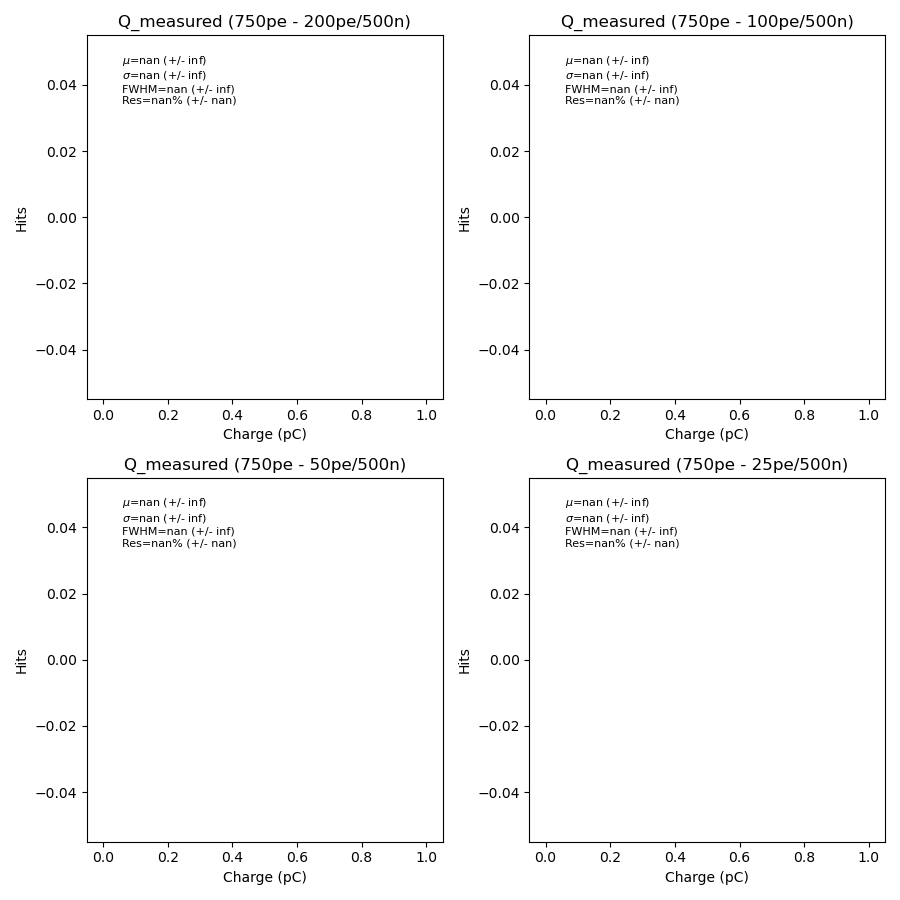

/home/viherbos/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [14]:
print("Resolution 25pe = ", np.std(df_25pe['Q_measured'])/np.mean(df_25pe['Q_measured'])*100)
print("Accuracy 25pe = ", np.mean(df_25pe['error']/np.mean(df_25pe['Q_measured'])*100))
print("Number of flips (mean) = ", np.mean(df_25pe['N_flips']))
print("\n")
print("Resolution 50pe = ", np.std(df_50pe['Q_measured'])/np.mean(df_50pe['Q_measured'])*100)
print("Accuracy 50pe = ", np.mean(df_50pe['error']/np.mean(df_50pe['Q_measured'])*100))
print("Number of flips (mean) = ", np.mean(df_50pe['N_flips']))
print("\n")
print("Resolution 100pe = ", np.std(df_100pe['Q_measured'])/np.mean(df_100pe['Q_measured'])*100)
print("Accuracy 100pe = ", np.mean(df_100pe['error']/np.mean(df_100pe['Q_measured'])*100))
print("Number of flips (mean) = ", np.mean(df_100pe['N_flips']))
print("\n")
print("Resolution 200pe = ",np.std(df_200pe['Q_measured'])/np.mean(df_200pe['Q_measured'])*100)
print("Accuracy 200pe = ", np.mean(df_200pe['error']/np.mean(df_200pe['Q_measured'])*100))
print("Number of flips (mean) = ", np.mean(df_200pe['N_flips']))

fit_pe = fit_lib.gauss_fit()
fig = plt.figure(figsize=(9,9))

fit_pe(df_200pe['Q_measured'],200)
fit_pe.plot(axis = fig.add_subplot(221),
            title = 'Q_measured (750pe - 200pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_100pe['Q_measured'],200)
fit_pe.plot(axis = fig.add_subplot(222),
            title = 'Q_measured (750pe - 100pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_50pe['Q_measured'],200)
fit_pe.plot(axis = fig.add_subplot(223),
            title = 'Q_measured (750pe - 50pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])
fit_pe(df_25pe['Q_measured'],200)
fit_pe.plot(axis = fig.add_subplot(224),
            title = 'Q_measured (750pe - 25pe/500n)',
            xlabel = 'Charge (pC)',
            ylabel = 'Hits',text_pos=[0.1,0.95,"left"])

fig.tight_layout()

In [15]:
df_200pe

,pe_density,Q_true,Q_measured,Qu,N_flips,Q_residue,error


In [16]:
df_25pe.reset_index(inplace=True)
df_50pe.reset_index(inplace=True)
df_100pe.reset_index(inplace=True)
df_200pe.reset_index(inplace=True)



In [17]:
df_25pe.loc[df_25pe['error'].idxmax()]

ValueError: attempt to get argmax of an empty sequence

In [18]:
df_25pe.loc[24]

KeyError: 24

df_25pe

In [146]:
df_25pe

,level_0,index,pe_density,Q_true,Q_measured,Qu,N_flips,Q_residue,error
0,0,300,25pe,155.986,156.510540,6.2418,23,67.509140,-0.524540
1,1,301,25pe,156.003,156.701780,6.2418,26,48.974980,-0.698780
2,2,302,25pe,155.990,156.445792,6.2418,23,67.444392,-0.455792
3,3,303,25pe,155.993,156.417895,6.2418,23,67.416495,-0.424895
4,4,304,25pe,153.017,149.779296,6.2418,20,79.503296,3.237704
...,...,...,...,...,...,...,...,...,...
95,95,395,25pe,155.996,156.382607,6.2418,22,73.623007,-0.386607
96,96,396,25pe,155.996,156.470629,6.2418,22,73.711029,-0.474629
97,97,397,25pe,155.997,150.199369,6.2418,24,54.956169,5.797631
98,98,398,25pe,155.997,156.397829,6.2418,23,67.396429,-0.400829
